In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 83% 135M/163M [00:00<00:00, 289MB/s]
100% 163M/163M [00:00<00:00, 294MB/s]


In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:09<00:00, 22.1MB/s]
100% 163M/163M [00:09<00:00, 18.9MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
#data = '/content/face-mask-dataset.zip'
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split
print("All Required Libraries Are Imported.....")

All Required Libraries Are Imported.....


In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_193.jpg', 'with_mask_754.jpg', 'with_mask_486.jpg', 'with_mask_2756.jpg', 'with_mask_1328.jpg']
['with_mask_2590.jpg', 'with_mask_1545.jpg', 'with_mask_3357.jpg', 'with_mask_1143.jpg', 'with_mask_2196.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1871.jpg', 'without_mask_1012.jpg', 'without_mask_2600.jpg', 'without_mask_1623.jpg', 'without_mask_1116.jpg']
['without_mask_2925.jpg', 'without_mask_3559.jpg', 'without_mask_38.jpg', 'without_mask_1333.jpg', 'without_mask_1137.jpg']


In [10]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [14]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [15]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [16]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [17]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

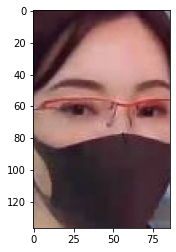

In [24]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_135.jpg')
a = plt.imshow(img)
plt.show()

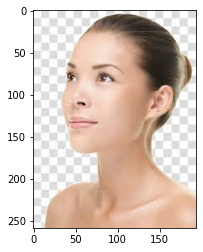

In [23]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [25]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [26]:
type(data)

list

In [28]:
len(data)


7553

In [31]:
data[0]

array([[[166, 115,  98],
        [159, 110,  95],
        [156, 111,  99],
        ...,
        [142, 100,  85],
        [145, 105,  90],
        [150, 113,  97]],

       [[164, 113,  97],
        [157, 109,  93],
        [153, 107,  96],
        ...,
        [138,  95,  80],
        [144, 103,  88],
        [147, 108,  93]],

       [[160, 111,  96],
        [155, 109,  95],
        [150, 108,  95],
        ...,
        [138,  95,  80],
        [147, 106,  92],
        [140, 102,  87]],

       ...,

       [[192, 145, 134],
        [193, 148, 137],
        [194, 149, 139],
        ...,
        [100,  74,  77],
        [102,  76,  79],
        [101,  75,  76]],

       [[190, 146, 131],
        [192, 149, 134],
        [195, 151, 137],
        ...,
        [ 95,  70,  73],
        [101,  75,  77],
        [102,  76,  77]],

       [[188, 145, 128],
        [191, 148, 132],
        [193, 148, 134],
        ...,
        [ 95,  70,  73],
        [ 94,  67,  70],
        [ 96,  70,  71]]

In [32]:
type(data[0])

numpy.ndarray

In [33]:
data[0].shape

(128, 128, 3)

In [36]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [37]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [38]:
print(Y[0])

1


**Train Test Split**

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [40]:
print(Y.shape, Y_train.shape, Y_test.shape)

(7553,) (6042,) (1511,)


In [41]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [42]:
X_train[0]

array([[[109, 107, 118],
        [114, 113, 121],
        [109, 107, 116],
        ...,
        [ 90,  97, 107],
        [ 90,  94, 105],
        [ 93,  97, 108]],

       [[110, 108, 119],
        [111, 108, 117],
        [110, 105, 114],
        ...,
        [ 86,  93, 103],
        [ 88,  92, 103],
        [ 89,  93, 104]],

       [[112, 107, 118],
        [113, 109, 118],
        [123, 117, 125],
        ...,
        [ 89,  95, 105],
        [ 91,  95, 106],
        [ 87,  91, 102]],

       ...,

       [[ 46,  66,  91],
        [ 45,  65,  90],
        [ 47,  67,  92],
        ...,
        [177, 143, 123],
        [176, 144, 123],
        [177, 145, 124]],

       [[ 49,  69,  93],
        [ 47,  67,  91],
        [ 46,  66,  90],
        ...,
        [179, 146, 126],
        [178, 146, 125],
        [177, 146, 125]],

       [[ 43,  63,  87],
        [ 43,  63,  87],
        [ 44,  64,  88],
        ...,
        [179, 147, 126],
        [177, 145, 124],
        [175, 144, 123]]

In [43]:
X_train_scaled[0]

array([[[0.42745098, 0.41960784, 0.4627451 ],
        [0.44705882, 0.44313725, 0.4745098 ],
        [0.42745098, 0.41960784, 0.45490196],
        ...,
        [0.35294118, 0.38039216, 0.41960784],
        [0.35294118, 0.36862745, 0.41176471],
        [0.36470588, 0.38039216, 0.42352941]],

       [[0.43137255, 0.42352941, 0.46666667],
        [0.43529412, 0.42352941, 0.45882353],
        [0.43137255, 0.41176471, 0.44705882],
        ...,
        [0.3372549 , 0.36470588, 0.40392157],
        [0.34509804, 0.36078431, 0.40392157],
        [0.34901961, 0.36470588, 0.40784314]],

       [[0.43921569, 0.41960784, 0.4627451 ],
        [0.44313725, 0.42745098, 0.4627451 ],
        [0.48235294, 0.45882353, 0.49019608],
        ...,
        [0.34901961, 0.37254902, 0.41176471],
        [0.35686275, 0.37254902, 0.41568627],
        [0.34117647, 0.35686275, 0.4       ]],

       ...,

       [[0.18039216, 0.25882353, 0.35686275],
        [0.17647059, 0.25490196, 0.35294118],
        [0.18431373, 0

**Building a Convolutional Neural Networks (CNN)**

In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [48]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [49]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 15s 21ms/step - loss: 0.5146 - accuracy: 0.7729 - val_loss: 0.3466 - val_accuracy: 0.8777
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.3067 - accuracy: 0.8755 - val_loss: 0.3073 - val_accuracy: 0.8711
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2494 - accuracy: 0.9003 - val_loss: 0.2890 - val_accuracy: 0.9008
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2225 - accuracy: 0.9102 - val_loss: 0.2711 - val_accuracy: 0.9058
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1803 - accuracy: 0.9323 - val_loss: 0.2960 - val_accuracy: 0.9091


**Model Evaluation**

In [50]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2389 - accuracy: 0.9206
Test Accuracy = 0.9205824136734009


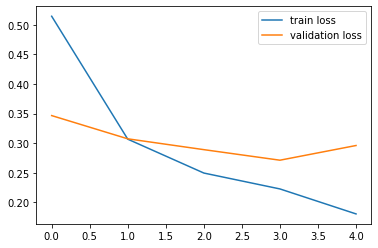

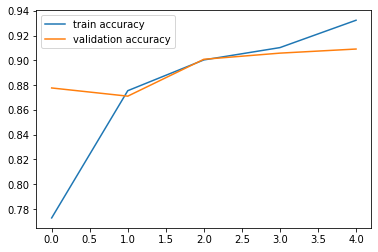

In [54]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/without_mask/without_mask_1006.jpg


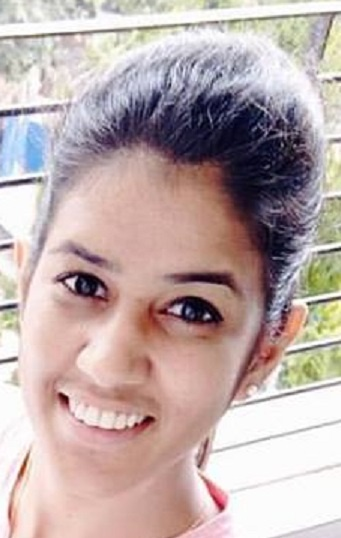

1/1 [==============================] - 0s 36ms/step
[[0.02116775 0.82981735]]
1
The person in the image is  wearing a mask


In [63]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is  wearing a mask')

Path of the image to be predicted: /content/Web capture_26-1-2023_9236_www.instagram.com.jpeg


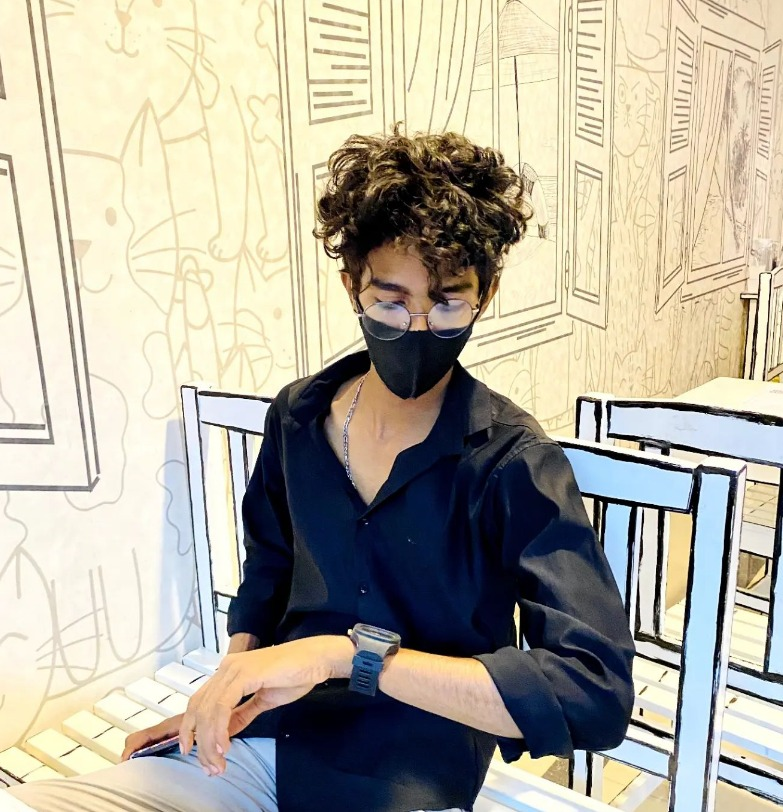

1/1 [==============================] - 0s 35ms/step
[[0.05167502 0.64407104]]
1
The person in the image is  wearing a mask


In [65]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is  wearing a mask')

In [66]:
import pickle

